# 2D數據類別劃分
**任務**
1. 采用Kmeans算法實現2D數據自動聚類，預測V1=80，V2=60數據類別
2. 計算預測準確率，完成結果矯正
3. 采用KNN、Meanshift算法，重複步驟1-2
數據：data.csv

## Kmeans算法
k均值聚类算法（k-means clustering algorithm）是一种迭代求解的聚类分析算法，其步骤是，预将数据分为K组，则随机选取K个对象作为初始的聚类中心，然后计算每个对象与各个种子聚类中心之间的距离，把每个对象分配给距离它最近的聚类中心。聚类中心以及分配给它们的对象就代表一个聚类。每分配一个样本，聚类的聚类中心会根据聚类中现有的对象被重新计算。这个过程将不断重复直到满足某个终止条件。终止条件可以是没有（或最小数目）对象被重新分配给不同的聚类，没有（或最小数目）聚类中心再发生变化，误差平方和局部最小。

**k-means聚类算法的优点有：**

1）算法思想简单，收敛速度快；

2）聚类效果较优；

3）主要需要调参的参数仅仅是簇数K；

4）算法的可解释度比较强。


**k-means聚类算法的缺点有：**

1）采用迭代方法，聚类结果往往收敛于局部最优而得不到全局最优解；

2）对非凸形状的类簇识别效果差；

3）易受噪声、边缘点、孤立点影响；

4）可处理的数据类型有限，对于高维数据对象的聚类效果不佳；

5）K值的选取不好把握。

**K值就是劃分為幾類**

In [113]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [114]:
#define X and y
X = data.drop(['labels'],axis=1)
y = data.loc[:,'labels']
X.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [115]:
pd.value_counts(y) # 看一下每個類的分佈

2    1156
1     954
0     890
Name: labels, dtype: int64

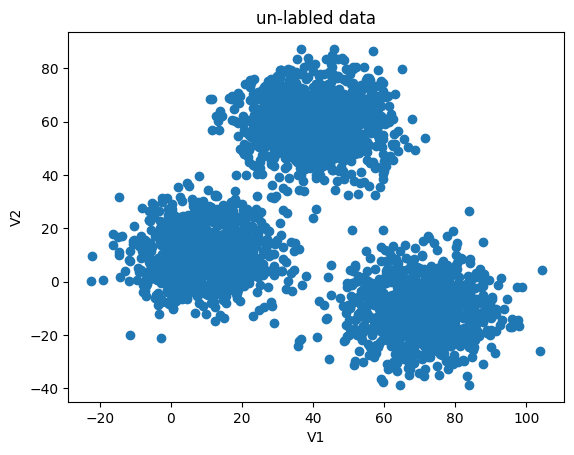

In [116]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:,'V1'],X.loc[:,'V2'])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

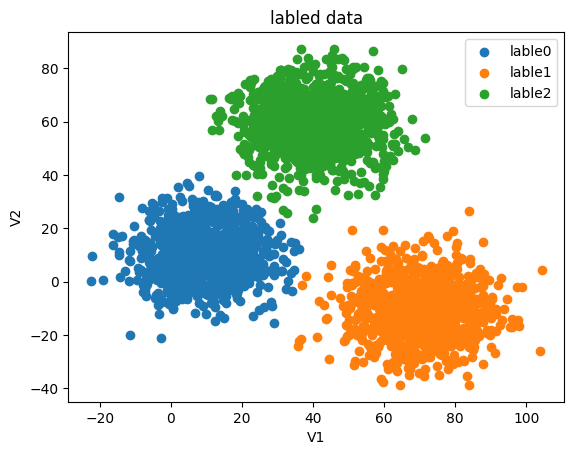

In [117]:
fig2 = plt.figure()
lable0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
lable1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
lable2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.show()

In [118]:
print(X.shape,y.shape)

(3000, 2) (3000,)


In [119]:
#set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0) #n_clusters的值就是分為幾類，也就是K值
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

In [120]:
centers = KM.cluster_centers_ #看一下中心點在哪
print(centers)

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


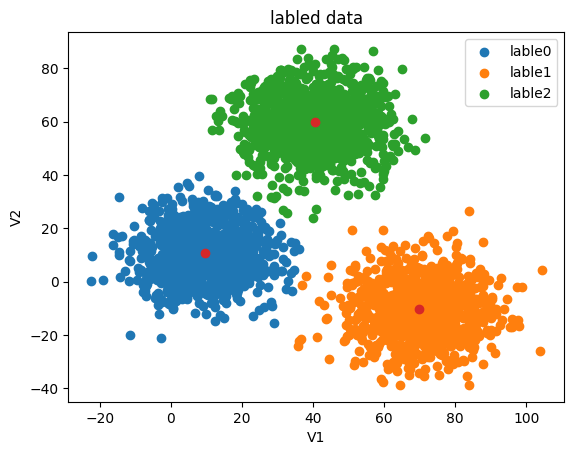

In [121]:
fig3 = plt.figure()
lable0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
lable1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
lable2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [122]:
#test data:V1=80,V2=60
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)

[1]


E:\python\anaconda3\envs\test\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [123]:
#predict based on training data
y_predict = KM.predict(X)
print(pd.value_counts(y_predict),pd.value_counts(y)) #看一下預測數據和原始數據的分佈區別

1    1149
0     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [124]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.0023333333333333335


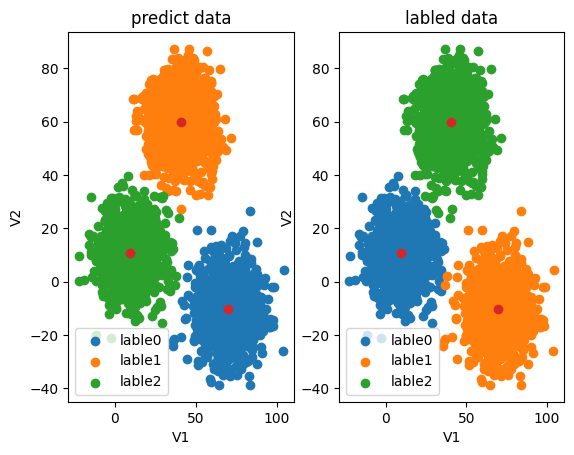

In [125]:
#visualize the data and results
fig4 = plt.subplot(121)
lable0 = plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
lable1 = plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
lable2 = plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])

plt.title('predict data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])

fig5 = plt.subplot(122)
lable0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
lable1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
lable2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [126]:
#correct the results
y_corrected = []
for i in y_predict:
    if i==0:
        y_corrected.append(1)
    elif i==1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)
print(pd.value_counts(y_corrected),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [127]:
print(accuracy_score(y,y_corrected))

0.997


In [128]:
#convert the results to numpy array
y_corrected = np.array(y_corrected) #轉換為數組不然後面[y_corrected==0]會報錯
print(type(y_corrected))

<class 'numpy.ndarray'>


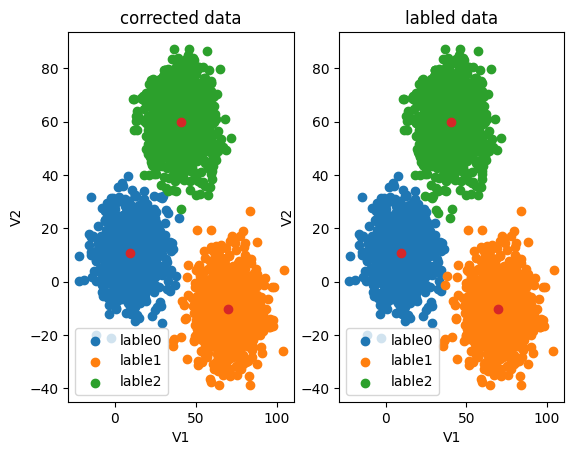

In [129]:
#visualize the data and results
fig4 = plt.subplot(121)
lable0 = plt.scatter(X.loc[:,'V1'][y_corrected==0],X.loc[:,'V2'][y_corrected==0])
lable1 = plt.scatter(X.loc[:,'V1'][y_corrected==1],X.loc[:,'V2'][y_corrected==1])
lable2 = plt.scatter(X.loc[:,'V1'][y_corrected==2],X.loc[:,'V2'][y_corrected==2])

plt.title('corrected data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])

fig5 = plt.subplot(122)
lable0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
lable1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
lable2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [130]:
#establish a KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [141]:
#predict based on the test data V1=80, V2=60
y_predict_knn_test = DKNN.predict([[80,60]])
y_predict_knn = KNN.predict(X)
print(y_predict_knn_test)
print('knn accuracy:',accuracy_score(y,y_predict_knn))

[2]
knn accuracy: 1.0


E:\python\anaconda3\envs\test\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


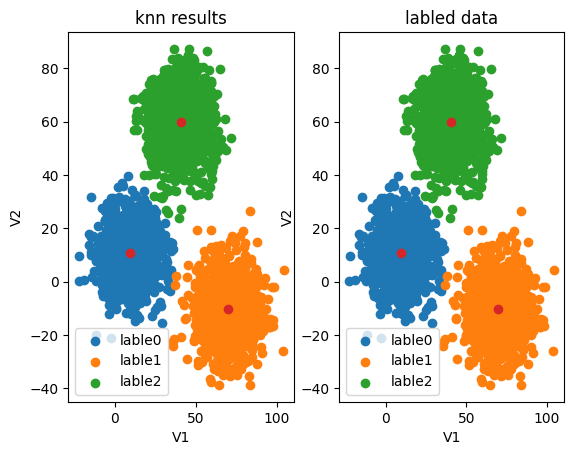

In [132]:
fig6 = plt.subplot(121)
lable0 = plt.scatter(X.loc[:,'V1'][y_predict_knn==0],X.loc[:,'V2'][y_predict_knn==0])
lable1 = plt.scatter(X.loc[:,'V1'][y_predict_knn==1],X.loc[:,'V2'][y_predict_knn==1])
lable2 = plt.scatter(X.loc[:,'V1'][y_predict_knn==2],X.loc[:,'V2'][y_predict_knn==2])

plt.title('knn results')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
lable0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
lable1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
lable2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [133]:
#try meanshift model
from sklearn.cluster import MeanShift,estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X,n_samples=500) #半徑，帶寬
print(bw)

30.84663454820215


In [134]:
#establish the meanshift model
ms = MeanShift(bandwidth=bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

In [135]:
y_predict_ms = ms.predict(X)
print(pd.value_counts(y_predict_ms),pd.value_counts(y))

0    1149
1     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


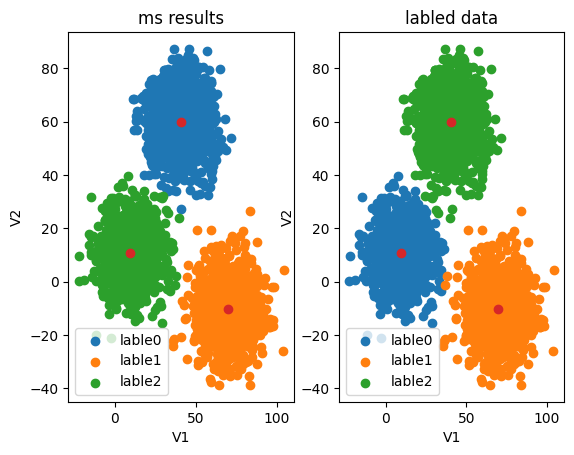

In [136]:
fig8 = plt.subplot(121)
lable0 = plt.scatter(X.loc[:,'V1'][y_predict_ms==0],X.loc[:,'V2'][y_predict_ms==0])
lable1 = plt.scatter(X.loc[:,'V1'][y_predict_ms==1],X.loc[:,'V2'][y_predict_ms==1])
lable2 = plt.scatter(X.loc[:,'V1'][y_predict_ms==2],X.loc[:,'V2'][y_predict_ms==2])

plt.title('ms results')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])

fig9 = plt.subplot(122)
lable0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
lable1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
lable2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [144]:
#correct the results
y_corrected_ms = []
for i in y_predict_ms:
    if i==0:
        y_corrected_ms.append(2)
    elif i==1:
        y_corrected_ms.append(1)
    else:
        y_corrected_ms.append(0)
print(pd.value_counts(y_corrected_ms),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [145]:
#convert the results to numpy array
y_corrected_ms = np.array(y_corrected_ms) #轉換為數組不然後面[y_corrected==0]會報錯
print(type(y_corrected))

<class 'numpy.ndarray'>


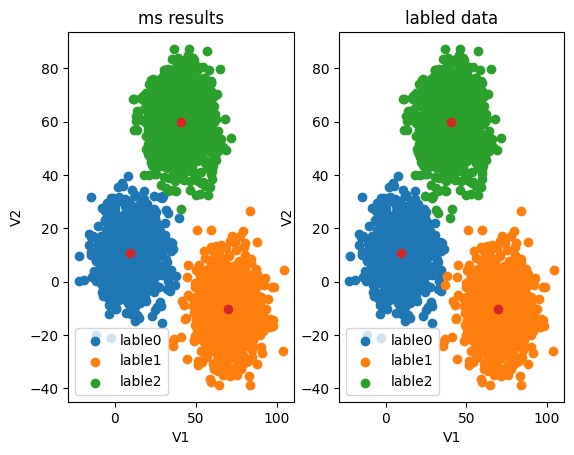

In [146]:
fig8 = plt.subplot(121)
lable0 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==0],X.loc[:,'V2'][y_corrected_ms==0])
lable1 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==1],X.loc[:,'V2'][y_corrected_ms==1])
lable2 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==2],X.loc[:,'V2'][y_corrected_ms==2])

plt.title('ms results')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])

fig9 = plt.subplot(122)
lable0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
lable1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
lable2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((lable0,lable1,lable2),('lable0','lable1','lable2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()